IMPORTING LIBRARIES

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

IMPORTING DATASET

In [53]:
dataset = pd.read_csv('ad_feature.csv')

ad_count = dataset['adgroup_id'].value_counts()
top_ads = ad_count.head(10).index.tolist()
dataset = dataset[dataset['adgroup_id'].isin(top_ads)]

IMPLEMENTING UCB

In [54]:
n = 10000
d = len(top_ads)
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
rewards = []

for i in range(n):
    ad = 0
    max_upper_bound = 0
    for j in range(d):
        if number_of_selections[j] > 0:
            average_reward = sums_of_rewards[j]/number_of_selections[j]
            delta_i = sqrt(2*log(i+1)/number_of_selections[j])
            upper_bound = average_reward+delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = j

    ads_selected.append(ad)
    number_of_selections[ad] += 1
    selected_adgroup_id = top_ads[ad]
    selected_row = dataset[dataset['adgroup_id'] == selected_adgroup_id].sample(1).iloc[0]
    reward = selected_row['price']
    sums_of_rewards[ad] += reward
    total_reward += reward
    rewards.append(reward)

print("TOTAL REWARD OBTAINED WITH UCB: ", total_reward)

TOTAL REWARD OBTAINED WITH UCB:  2788417.99


VISUALISING THE RESULT

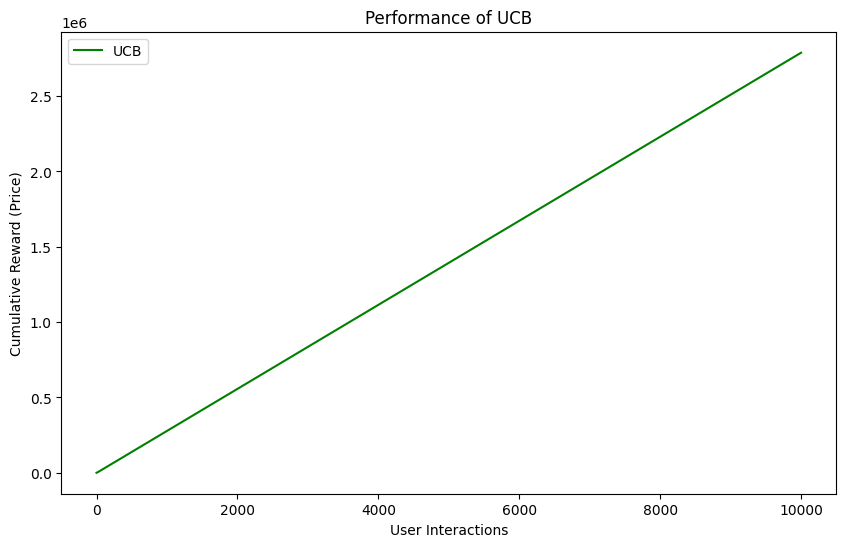

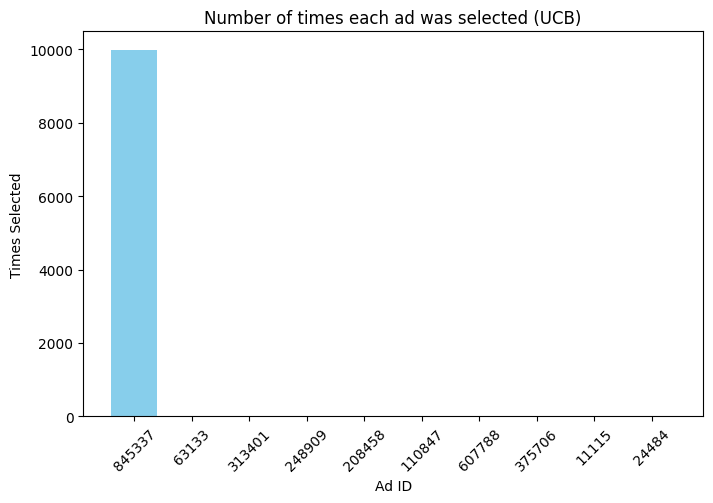


 average reward per ad:
ad 845337 → selected 9991 times, average reward = 279.00
ad 63133 → selected 1 times, average reward = 170.00
ad 313401 → selected 1 times, average reward = 199.00
ad 248909 → selected 1 times, average reward = 38.00
ad 208458 → selected 1 times, average reward = 139.00
ad 110847 → selected 1 times, average reward = 32.99
ad 607788 → selected 1 times, average reward = 199.00
ad 375706 → selected 1 times, average reward = 99.00
ad 11115 → selected 1 times, average reward = 33.00
ad 24484 → selected 1 times, average reward = 19.00


In [55]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(rewards), label="UCB", color="green")
plt.xlabel("User Interactions")
plt.ylabel("Cumulative Reward (Price)")
plt.title("Performance of UCB")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(range(d), number_of_selections, color="skyblue")
plt.xticks(range(d), top_ads, rotation=45)
plt.xlabel("Ad ID")
plt.ylabel("Times Selected")
plt.title("Number of times each ad was selected (UCB)")
plt.show()

print("\n average reward per ad:")
for j in range(d):
    avg_reward = sums_of_rewards[j] / number_of_selections[j] if number_of_selections[j] > 0 else 0
    print(f"ad {top_ads[j]} → selected {number_of_selections[j]} times, "
          f"average reward = {avg_reward:.2f}")
